# Liver Challenge    
The liver tumer dataset is from LiTS - Liver Tumor Segmentation Challenge   
    https://competitions.codalab.org/competitions/17094  

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import nibabel as nib

import matplotlib.pyplot as plt
%matplotlib inline

root_path = '/media/share/data/Liver/LiverChallengeData/'

/opt/conda/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from random import sample

df = pd.read_csv(root_path + '/caselist.csv', header=None, names=['filename'])
df['filename'] = sorted(df['filename'], key=lambda x: int(x.replace('volume-', '').replace('.nii', '')))
df.sample(5)

,filename
36,volume-36.nii
104,volume-104.nii
44,volume-44.nii
46,volume-46.nii
75,volume-75.nii


### Data is in nii formate, so we need nibabel to read nii file   
- import nibabel  
- read nii.header  

### Image transpose  
    0 | unknown | sform not defined   
    1 | scanner | RAS+ in scanner coordinates   
    2 | aligned | RAS+ aligned to some other scan  
    
- check encoding direction using qform_code and sform_code  
- check datatype: int16 or int32

In [3]:
!pip install nibabel

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


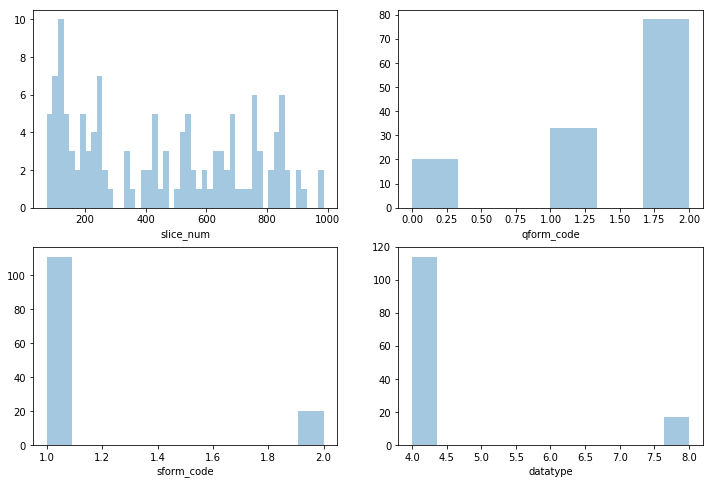

In [4]:
import nibabel as nib
import seaborn as sns

slicenum = []
qform_code = []
sform_code = []
datatype = []

for i in df.index:
    nii = nib.load(str(Path(root_path, 'media', 'volume-%d.nii' %(i))))
    img = nii.get_data()
    
    slicenum.append(img.shape[2])
    qform_code.append(nii.header['qform_code'])
    sform_code.append(nii.header['sform_code'])
    datatype.append(nii.header['datatype'])
    
    
fig = plt.figure(figsize=(12, 8))
sns.distplot(slicenum, kde=False, bins=50, ax=fig.add_subplot(2, 2, 1), axlabel='slice_num')
sns.distplot(qform_code, kde=False, ax=fig.add_subplot(2, 2, 2), axlabel='qform_code')
sns.distplot(sform_code, kde=False, ax=fig.add_subplot(2, 2, 3), axlabel='sform_code')
sns.distplot(datatype, kde=False, ax=fig.add_subplot(2, 2, 4), axlabel='datatype')

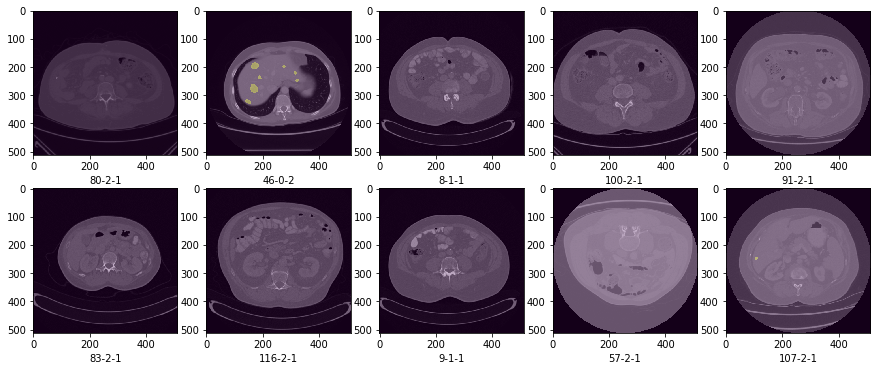

In [5]:
# Random select and plot images
picn = 0
fig = plt.figure(figsize=(15, 6))

for i in sample(list(df.index), 10):
    # import images and masks
    nii = nib.load(str(Path(root_path, 'media', 'volume-%d.nii' %(i))))
    img = nii.get_data()
    mask = nib.load(str(Path(root_path, 'media', 'segmentation-%d.nii' %(i)))).get_data()

    # image transformation
    if nii.header['qform_code'] == 1:
        img = np.transpose(img, [1, 0, 2])[::-1,:,::-1]
        mask = np.transpose(mask, [1, 0, 2])[::-1,:,::-1]
    elif nii.header['qform_code'] == 2:
        if nii.header['datatype'] == 8:
            img = np.transpose(img, [1, 0, 2])[::-1,:,::-1]
            mask = np.transpose(mask, [1, 0, 2])[::-1,:,::-1]
        else:
            img = np.transpose(img, [1, 0, 2])
            mask = np.transpose(mask, [1, 0, 2])
    else:
        img = np.transpose(img, [1, 0, 2])[::-1,:,:]
        mask = np.transpose(mask, [1, 0, 2])[::-1,:,:]
        
    # plot images and masks    
    ax = fig.add_subplot(2, 5, picn+1)
    ax.imshow(img[:, :, img.shape[2]//2], cmap='gray')
#     ax.imshow(mask[:, :, mask.shape[2]//2] == 1, alpha=0.3)
    ax.imshow(mask[:, :, mask.shape[2]//2] == 2, alpha=0.3)
    plt.xlabel('%d-%d-%d' %(i, nii.header['qform_code'], nii.header['sform_code']))
    
    picn += 1

In [6]:
from ipywidgets import interact

nii = nib.load(str(Path(root_path, 'media', 'volume-105.nii')))
img = nii.get_data()
new_img = np.transpose(img, [1, 0, 2])

def show_slice(z):
    plt.figure(figsize=(10, 10))
    plt.imshow(new_img[:, :, z], cmap='gray')
    
interact(show_slice, z=(0, new_img.shape[2]-1))

interactive(children=(IntSlider(value=492, description='z', max=985), Output()), _dom_classes=('widget-interact',))

<function __main__.show_slice>